**Copyright: © NexStream Technical Education, LLC**.  
All rights reserved

#**PART 1**:  Simple Linear Regression - Manual Calculation
In this project, you will perform a manual calculation of the coefficients used in a simple linear regression model for a given dataset.
Please reference the video lectures on Simple and Multiple Linear Regression for a description of this example and the main functions you will need in the implementation.
Please complete the following steps in your Colab Script.  The reference script below provides template code and hints to help with each step.  You will be turning in code and screenshots of your console output in an accompanying assignment.

-  **Step 1**:  For the input parameters (dataset) given in the cell below, create a scatter plot of Glucose level (y parameter) vs. Age (x parameter).
-  **Step 2**:  Calculate the coefficients for a simple linear regression model using the following equations:  (NOTE, you may NOT use any machine learning library models for this step - you must calculate the parameters use the equations shown).  

$$\hat y = b_0+b_1x_1$$  
$$b_1=\frac {\sum
(x_n-\bar x)(y_n-\bar y)} {\sum
(x_n-\bar x)^2}
$$  
$$b_0=\bar y-b_1\bar x$$  

-  **Step 3**:  Create a scatter plot of the input dataset and generated regression line on the same plot. 
-  **Step 4**:  Calculate the performance using R-squared using sklearn r2_score function (you may use the sklearn library for this step).
-  **Step 5**:  Confirm your calculated coefficients and R-squared performance metric using the embedded doctest module.  Record your regression equation - you will need to upload this to the accompanying assignment.
-  **Step 6**:  Reflect on the performance of your model.  What does the R-squared parameter tell you about the properties of this dataset and your simple linear prediction?  For example, is age a good predictor of glucose level?  You will answer this question in the accompanying assignment.


PYDEV DEBUGGER WARNING:
sys.settrace() should not be used when the debugger is being used.
This may cause the debugger to stop working correctly.
If this is needed, please check: 
http://pydev.blogspot.com/2007/06/why-cant-pydev-debugger-work-with.html
to see how to restore the debug tracing back correctly.
Call Location:
  File "/usr/lib/python3.8/doctest.py", line 1487, in run
    sys.settrace(save_trace)



TestResults(failed=0, attempted=3)

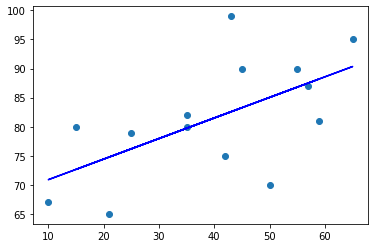

In [1]:
#Simple Linear Regression - Manual Calculation
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score

#Input Parameters
X = Age = np.array([43,21,25,42,57,59,35,15,55,50,65,10,45,35])
Y = Glucose = np.array([99,65,79,75,87,81,80,80,90,70,95,67,90,82])


#Step 1:  Create a scatter plot of Glucose level (y parameter) vs. Age (x parameter). 
#         Your plot must include x and y labels.
# YOUR CODE HERE...


#Step 2:  Create a function which MANALLY (using the equations) calculates the 
#         coefficients for a simple linear regression model.
#         Your function must input numpy arrays for the x and y variables and return b0 and b1.
#         Your function MUST use equations shown in the text cell above. 
#         (NOTE - you may not use a model API for this step, calculate the parameters use the equations above).
def simpleLRcoeffsManual(X, Y):
  b1 = (np.sum((X - np.mean(X)) * (Y - np.mean(Y)))) / (np.sum((X - np.mean(X))**2))
  b0 = np.mean(Y) - (b1 * np.mean(X))
  
  return (b0, b1)

#Step 3:  Create a scatter plot of the input dataset and generated regression line (yhat = x*b1 + b0) on the same plot.
b = simpleLRcoeffsManual(X, Y)
yhat = b[0] + (b[1] * X)
plt.scatter(X, Y)
plt.plot(X, b[0] + b[1] * X, 'b')

#Step 4:  Create a function which calculates the performance using R-squared using sklearn r2_score function.
#         Your function input parameters are y (actual values) and y_hat (predicted).
#         Your function returns the R-squared value
#         Hint:  see https://scikit-learn.org/stable/modules/generated/sklearn.metrics.r2_score.html
def simpleLRscore(y, yhat):
  return r2_score(y, yhat)


#Step 5:  Run the doctest module.  DO NOT modify any code below this line!
import doctest
"""
  >>> print('b1:', round(simpleLRcoeffsManual(Age, Glucose)[1], 3))
  b1: 0.354
  >>> print('b0:', round(simpleLRcoeffsManual(Age, Glucose)[0], 3))
  b0: 67.348
  >>> print('r2:', round(simpleLRscore(Glucose, yhat), 3))
  r2: 0.357
"""

doctest.testmod()

#**PART 2**:  Simple Linear Regression using Scikit learn

In this project, you will experiment with the functions used to train a simple linear regression model using the Scikit learn library.
Please reference the video lectures on Simple and Multiple Linear Regression for a description of this example and the main functions you will need in the implementation.
Please complete the following steps in your Colab Script.  The reference script below provides template code and hints to help with each step.  

-  **Step 1**:  Calculate the coefficients for a simple linear regression model using the appropriate sklearn functions (see the code below for hints).
-  **Step 2**:  Create a scatter plot of the input dataset and generated regression line on the same plot. 
-  **Step 3**:  Calculate the performance using R-squared using sklearn r2_score function. 
-  **Step 4**:  Run the cell and confirm the coefficients and R-squared using the embedded doctest module.  
-  **Step 5**:  Reflect on the performance of your model.  Confirm your outputs are the same as from Part 1, are they the same and should they be the same?


[[0.35391241]]


TestResults(failed=0, attempted=3)

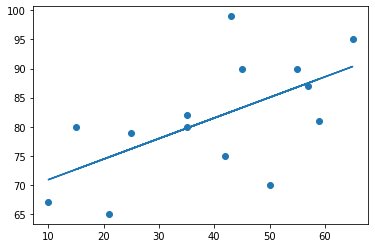

In [2]:
from sklearn.linear_model import LinearRegression
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score
scikit_LinearRegressor = LinearRegression()

#Input Parameters
Age = np.array([43,21,25,42,57,59,35,15,55,50,65,10,45,35])
Glucose = np.array([99,65,79,75,87,81,80,80,90,70,95,67,90,82])
AgeReshaped = Age.T.reshape(-1,1)   #T=transpose, -1=unknown rows, 1=col 
GlucoseReshaped = Glucose.T.reshape(-1,1) 


#Step 2:  Create a function which calculates the coefficients for a simple linear regression model 
#         Your function must input numpy arrays for the x and y variables and return coefficients b0,b1, and Yhat (predicted output).
#         Your function MUST use the sklearn functions.
#         Hint: Construct a linear regression object, then "fit" the data:
#             https://scikit-learn.org/0.18/modules/generated/sklearn.linear_model.LinearRegression.html#sklearn.linear_model.LinearRegression.fit
#             https://scikit-learn.org/0.18/modules/generated/sklearn.linear_model.LinearRegression.html#sklearn.linear_model.LinearRegression.predict
#         
#         
def simpleLRcoeffsSkLearn(X, Y):
#Return the tuple: b1, b0, Yhat in this order 
#Note - you must return your outputs in the order above in order to pass the doctest module.
  scikit_LinearRegressor.fit(X, Y)

  return (scikit_LinearRegressor.coef_, scikit_LinearRegressor.intercept_, scikit_LinearRegressor.predict(X))

#Step 3:  Create a scatter plot of the input dataset and generated regression line on the same plot.
#         Hint: make sure you transpose and reshape yhat.  (yhat.T.reshape(-1,1))
# YOUR CODE HERE...

b = simpleLRcoeffsSkLearn(AgeReshaped, GlucoseReshaped)
yhat = b[0] + (b[1] * X)
yhat.T.reshape(-1,1)
print(b[0]) #(X, "\n \n", Y)
plt.scatter(X, Y)
plt.plot(X, b[0][0]*X + b[1]) #X, b[0] + b[1] * X, 'r'

#Step 4:  Calculate the performance using R-squared using sklearn r2_score function.
def simpleLRscoreSkLearn(y, yhat):
  return r2_score(y, yhat)

#Step 5:  Run the doctest module.  DO NOT modify any code below this line!

import doctest
"""
  >>> print('b1:', simpleLRcoeffsSkLearn(AgeReshaped, GlucoseReshaped)[0][0])
  b1: [0.35391241]
  >>> print('b0:', simpleLRcoeffsSkLearn(AgeReshaped, GlucoseReshaped)[1][0])
  b0: 67.34791357165692
  >>> print('r2:', simpleLRscoreSkLearn(GlucoseReshaped, simpleLRcoeffsSkLearn(AgeReshaped, GlucoseReshaped)[2]))
  r2: 0.35733001480762194
"""

doctest.testmod()

#**PART 3**: Multiple Linear Regression
In this project, you will expand on the example provided in the lecture train a multiple linear regression model using Pandas and the Scikit learn library and determine which independent variables have the greatest effect on the model performance.
Please reference the video lectures on Simple and Multiple Linear Regression for a description of this example and the main functions you will need in the implementation.  The Multiple Linear Regression equation is shown here for reference:  

$$\hat y = b_0+b_1x_1+b_2x_2=B^T\cdot X$$   

Please complete the following steps in your Colab Script.  The reference script below provides template code and hints to help with each step.  

-  **Step 1**:  Input the Stock Market dataset into a Pandas dataframe.
-  **Step 2**:  Examine the relationship between the variables
-  **Step 3**:  Write a function which performs Multiple Linear Regression (MLR) on the input dataset.
-  **Step 4**:  Fit the regression model for ALL combinations of indep vars
-  **Step 5**:  Predict the stock index price using your top 2 models from the test cases shown in the code cell below (i.e. test your top 2 models with the best r2 scores).
-  **Step 6**: Record your regression equation - you will need to upload this to the accompanying assignment. Reflect on your results.  What combination of independent variables gave the best performing model?  Note that the more variable you use in your model, the more memory and processing resources you will need so does it make sense to use all of your independent variables if a subset is close in performance?


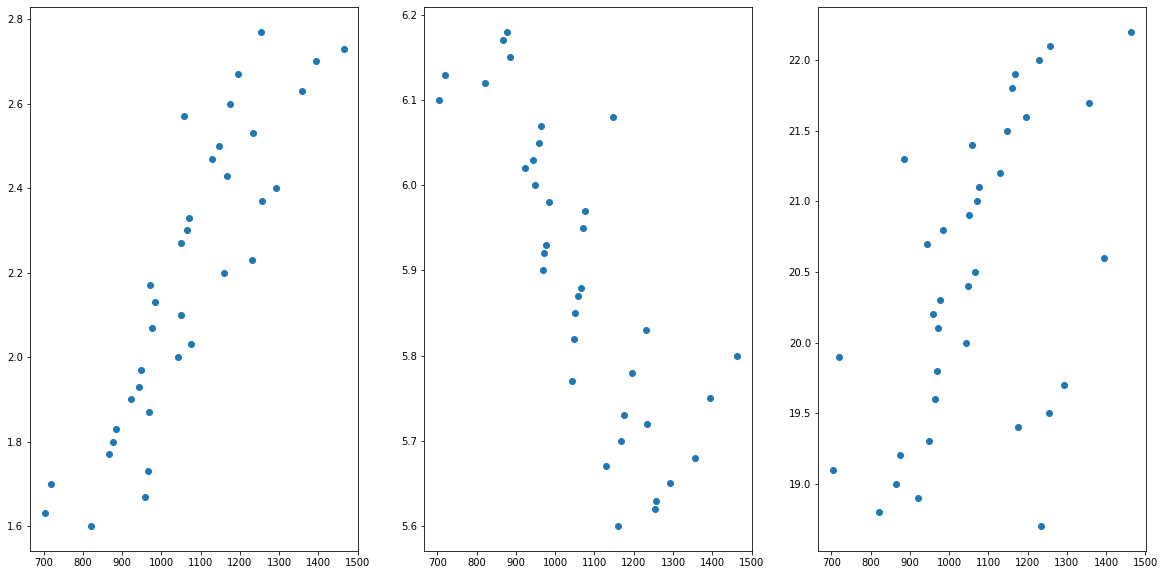

The predicted Stock Price for Test Case 1 with the highest r2 value is: [1408.29007322]
The predicted Stock Price for Test Case 2 with the highest r2 value is: [1289.39364186]


The predicted Stock Price for Test Case 1 with the second highest r2 value is: [1436.67470438]
The predicted Stock Price for Test Case 2 with the second highest r2 value is: [1297.74840846]


In [3]:
#Multiple Linear Regression
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
import statsmodels.api as sm

Stock_Market = {'Year':[2018,2018,2018,2018,2018,2018,2018,2018,2018,2018,2018,2018,\
                         2017,2017,2017,2017,2017,2017,2017,2017,2017,2017,2017,2017,\
                         2016,2016,2016,2016,2016,2016,2016,2016,2016,2016,2016,2016],\
                'Month':[12,11,10,9,8,7,6,5,4,3,2,1, 12,11,10,9,8,7,6,5,4,3,2,1, 12,11,10,9,8,7,6,5,4,3,2,1],\
                'Interest_Rate':[2.73, 2.7,  2.63, 2.4,  2.37, 2.77, 2.53, 2.23, 2.67, 2.6,  2.43, 2.2,  2.5,  2.47,\
                                 2.03, 2.33, 2.3,  2.57, 2.27, 2.1,  2.,   2.13, 2.07, 2.17, 1.87, 1.73, 1.67, 1.97,\
                                 1.93, 1.9,  1.83, 1.8,  1.77, 1.6,  1.7,  1.63],\
                'Unemployment_Rate':[5.8,  5.75, 5.68, 5.65, 5.63, 5.62, 5.72, 5.83, 5.78, 5.73, 5.7,  5.6,  6.08, 5.67,\
                                     5.97, 5.95, 5.88, 5.87, 5.85, 5.82, 5.77, 5.98, 5.93, 5.92, 5.9,  6.07, 6.05, 6.,\
                                     6.03, 6.02, 6.15, 6.18, 6.17, 6.12, 6.13, 6.1],\
                'GDP':[22.2, 20.6, 21.7, 19.7, 22.1, 19.5, 18.7, 22.,  21.6, 19.4, 21.9, 21.8,\
                       21.5, 21.2, 21.1, 21.,  20.5, 21.4, 20.9, 20.4, 20.,  20.8, 20.3, 20.1,\
                       19.8, 19.6, 20.2, 19.3, 20.7, 18.9, 21.3, 19.2, 19.,  18.8, 19.9, 19.1],\
                'Stock_Index_Price': [1464,1394,1357,1293,1256,1254,1234,1230,1195,1175,1167,1159,\
                                      1147,1130,1075,1071,1065,1058,1051,1049,1043, 984, 976, 971,\
                                       968, 965, 958, 949, 943, 922, 884, 876, 866, 822, 719, 704]
                }

#Step 1:  Input the Stock Market dataset into a Pandas dataframe.
#         Print out a description of the data.
#         Hint: https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.describe.html
stockMarket_DataFrame = pd.DataFrame(Stock_Market)
stockMarket_DataFrame.head()

#Step 2:  Examine the relationship between the variables
#         Plot each of the independent variables vs. Stock_Index_Price using Matplotlib
#         Which independent vars do you think will have the greatest impact on the dep variable?
fig, ax = plt.subplots(1, 3, figsize=(20,10))
ax[0].scatter(stockMarket_DataFrame.Stock_Index_Price, stockMarket_DataFrame.Interest_Rate)
ax[1].scatter(stockMarket_DataFrame.Stock_Index_Price, stockMarket_DataFrame.Unemployment_Rate)
ax[2].scatter(stockMarket_DataFrame.Stock_Index_Price, stockMarket_DataFrame.GDP)

plt.show()

#Step 3:  Write a function which performs Multiple Linear Regression (MLR) on the input dataset.
#         Use sklearn to perform the MLR and determine the intercept and coefficents.
#         Your function must input parameters X, Y for the indep variable and dependent variable respectively.
#         Your function must return the intercept, coefficients, and score in this exact order.
#         Hint:  https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html
#         Hint:  https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html#sklearn.linear_model.LinearRegression.fit
#         Hint:  https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html#sklearn.linear_model.LinearRegression.predict
#         Hint:  https://scikit-learn.org/stable/modules/generated/sklearn.metrics.r2_score.html
fitted = np.array([])
def MLR(X, Y):
  model = linear_model.LinearRegression()
  model.fit(X, Y)

  return [model.intercept_, model.coef_, r2_score(Y, model.predict(X))] #b0, b1, r2


#Step 4:  Fit the regression model for ALL combinations of indep vars
#         Call the function you created in Step 3.
#         Print out the intercept, coefficients and r2 score for each of the cases.
#         Hint:  Extract the X parameter from the dataframe.
#         Hint:  The Y parameter will be Stock_Index_Price for all cases.
#Case 1:  Interest Rate only
#Case 2:  Unemployment Rate only
#Case 3:  GDP only
#Case 4:  Interest Rate + Unemployment Rate
#Case 5:  Interest Rate + GDP
#Case 6:  Unemployment Rate + GDP
#Case 7:  Interest Rate + Unemployment Rate + GDP
Y = stockMarket_DataFrame.Stock_Index_Price
intrestRateOnly = MLR(stockMarket_DataFrame[['Interest_Rate']], Y)
unemploymentRateOnly = MLR(stockMarket_DataFrame[['Unemployment_Rate']], Y)
gdpOnly = MLR(stockMarket_DataFrame[['GDP']], Y)
intrestRate_unemploymentRate = MLR(stockMarket_DataFrame[['Interest_Rate', 'Unemployment_Rate']], Y) #<------ Second highest r2 value
intrestRate_GDP = MLR(stockMarket_DataFrame[['Interest_Rate', 'GDP']], Y)
unemploymentRate_GDP = MLR(stockMarket_DataFrame[['Unemployment_Rate', 'GDP']], Y)
intrestRate_unemploymentRate_GDP = MLR(stockMarket_DataFrame[['Interest_Rate', 'Unemployment_Rate', 'GDP']], Y)#<------ Highest r2 value


#Step 5:  Predict the stock index price using your top 2 models with the following test cases (i.e. the top 2 models with the best r2 scores):    <---- Use YHat with the coeffecients
#         You should regenerate your model in case it was overwritten in the previous step when testing the other conditions.
#         Set the values for each of the independent variables, then call the sklearn predict function.
#         Hint:  https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html#sklearn.linear_model.LinearRegression.predict
#         Test case 1:  Predict the stock index price based on the following:
#                       New_Interest_Rate = 2.75
#                       New_Unemployment_Rate = 5.3
#                       New_GDP = 20.0
#         Test case 2:  Predict the stock index price based on the following:
#                       New_Interest_Rate = 2.9
#                       New_Unemployment_Rate = 5.9
#                       New_GDP = 21.0
# NOTE - **** if your model does not use all 3 of the parameters given in the test cases above, then just leave them out **** 
# YOUR CODE HERE...
testCase1_DF = pd.DataFrame({
    'Interest_Rate': [2.75],
    'Unemployment_Rate': [5.3],
    'GDP': [20.0]
})
testCase2_DF = pd.DataFrame({
    'Interest_Rate': [2.9],
    'Unemployment_Rate': [5.9],
    'GDP': [21.0]
})

model = linear_model.LinearRegression()
#Highest r2 value
model.fit(stockMarket_DataFrame[['Interest_Rate', 'Unemployment_Rate', 'GDP']], Y)
print("The predicted Stock Price for Test Case 1 with the highest r2 value is:", model.predict(testCase1_DF[['Interest_Rate', 'Unemployment_Rate', 'GDP']]))
print("The predicted Stock Price for Test Case 2 with the highest r2 value is:", model.predict(testCase2_DF[['Interest_Rate', 'Unemployment_Rate', 'GDP']]))

print('\n')

#Highest r2 value
model.fit(stockMarket_DataFrame[['Interest_Rate', 'Unemployment_Rate']], Y)
print("The predicted Stock Price for Test Case 1 with the second highest r2 value is:", model.predict(testCase1_DF[['Interest_Rate', 'Unemployment_Rate']]))
print("The predicted Stock Price for Test Case 2 with the second highest r2 value is:", model.predict(testCase2_DF[['Interest_Rate', 'Unemployment_Rate']]))

#**PART 4**:  Multiple Linear Regression using Actual Data
In this section you will continue the analysis from Part 3 but this time you will search and find ACTUAL data from 2018-2020 based on at least 4 of the following independent variables:
- **Unemployment:** https://www.bls.gov/charts/employment-situation/civilian-unemployment-rate.htm
- **Effective Federal Funds rate:**  https://fred.stlouisfed.org/series/FEDFUNDS (fedfunds.csv in downloads)
- **Average Temperature in NYC:**  https://www.weather.gov/media/okx/Climate/CentralPark/monthlyannualtemp.pdf.  

and/or find some on your own, for example search for one of the following during the time period:
- Savings rate
- Personal income
- Average home price in NYC
- Inflation rate
- Birth rate
- Others? your choice as long as they are appropriate and relevant!

----- Procedure ------
- **Step 1**:  Find at least 3 ACTUAL datasets representing independent variables that might affect the stock index price between the years 2018-2020 (36 months total).  Your data should be in monthly increments.
- **Step 2**:  Input the data to your script.  Use Part 3 in this project as a guide.
- **Step 3**:  Examine the relationship between the variables.  If linear relationships exist, they should be a good candidate variable for your model.
- **Step 4**:  Fit the regression model for ALL combinations of indep vars.
- **Step 5**:  Predict the stock index price using your top 2 models with at least 2 test cases (you decide the independent variable values you would like to test with.
-  **Step 6**:  Record your regression equation - you will need to upload this to the accompanying assignment.  Reflect on your results.  What combination of independent variables gave the best performing model?  Did you find a subset of independent variables that performed well enough such that you don't need to consume the memory and processing required to include all of them?  



In [4]:
#Mount Drive
from google.colab import drive
drive.mount('/content/drive')
%cd /content/drive/MyDrive/ML_S23-Mauro/MachineLearning/Regression/LinearRegression

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/MyDrive/ML_S23-Mauro/MachineLearning/Regression/LinearRegression


In [15]:
#YOUR CODE HERE...
#I chose to use Unemployment Rate, Federal Funds Effective Rate, Inflation, and House Prices

#Import the necesary modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
import statsmodels.api as sm

#Define the regressor
model = linear_model.LinearRegression()

#Make all the respective DataFrames
UnemploymentRate_DataFrame = pd.read_csv('/content/drive/MyDrive/ML_S23-Mauro/MachineLearning/Regression/LinearRegression/UnemploymentRate.csv')
FederalEffectiveRate_DataFrame = pd.read_csv('/content/drive/MyDrive/ML_S23-Mauro/MachineLearning/Regression/LinearRegression/Federal_Intrest_Rate.csv')
InflationRate_DataFrame = pd.read_csv('/content/drive/MyDrive/ML_S23-Mauro/MachineLearning/Regression/LinearRegression/Inflation_Rate.csv')
HousePrices_DataFrame = pd.read_csv('/content/drive/MyDrive/ML_S23-Mauro/MachineLearning/Regression/LinearRegression/House_Price.csv')
#Stock Price Data Frame
StockPrice_DataFrame = pd.read_csv('/content/drive/MyDrive/ML_S23-Mauro/MachineLearning/Regression/LinearRegression/StockPrice_2018-2020.csv')

#Filter the Data
UnemploymentRate_DataFrame = UnemploymentRate_DataFrame.loc[(UnemploymentRate_DataFrame['DATE'] >= '2018-01-01') & (UnemploymentRate_DataFrame['DATE'] <= '2020-12-01')]
FederalEffectiveRate_DataFrame = FederalEffectiveRate_DataFrame.loc[(FederalEffectiveRate_DataFrame['DATE'] >= '2018-01-01') & (FederalEffectiveRate_DataFrame['DATE'] <= '2020-12-01')]

InflationRate_DataFrame.head()

InflationRate_DataFrame = InflationRate_DataFrame.loc[(InflationRate_DataFrame['Year'] >= '2018-01') & (InflationRate_DataFrame['Year'] <= '2020-12')]
HousePrices_DataFrame = HousePrices_DataFrame.loc[(HousePrices_DataFrame['Month of Observation'] >= '2018-01-01') & (HousePrices_DataFrame['Month of Observation'] <= '2020-12-01')]

#Make the funciton that fits the model
def fitTheModel(X, Y):
  model.fit(X, Y)

  # print(r2_score(Y, model.predict(X)), '\n')

  return [model.intercept_, model.coef_, r2_score(Y, model.predict(X))] #b0, b1, r2

#make a general data frame
general_DataFrame = pd.DataFrame({'Unemployment_Rate':list(UnemploymentRate_DataFrame['UNRATE']),\
                                  'Intrest_Rate':list(FederalEffectiveRate_DataFrame['FEDFUNDS']),\
                                  'Inflation_Rate':list(InflationRate_DataFrame['Intrest Rate']),\
                                  'House_Prices':list(HousePrices_DataFrame['Inflation Adjusted Price']),\
                                  'Stock_Index_Price': list(StockPrice_DataFrame['Open'])
})


#Test Cases
Y = StockPrice_DataFrame[['Close']]

unemploymentRate_inflationRate = fitTheModel(general_DataFrame[['Unemployment_Rate']], Y)
effectiveRates_inflationRate = fitTheModel(general_DataFrame[['Intrest_Rate', 'Inflation_Rate']], Y)
unemploymentRate_housePrices = fitTheModel(general_DataFrame[['Unemployment_Rate', 'House_Prices']], Y)#<---- 2nd highest r2 value
intrestRate_inflationRate_housePrices = fitTheModel(general_DataFrame[['Intrest_Rate', 'Inflation_Rate','House_Prices']], Y)
unemploymentRate_intrestRate_inflationRate_housePrices = fitTheModel(general_DataFrame[['Unemployment_Rate', 'Intrest_Rate', 'Inflation_Rate','House_Prices']], Y) #<---- Highest r2 value


testCase1_DF = pd.DataFrame({
    'Intrest_Rate': [2.75],
    'Unemployment_Rate': [5.3],
    'Inflation_Rate': [0.5],
    'House_Prices': [251239]
})
testCase2_DF = pd.DataFrame({
    'Intrest_Rate': [1.47],
    'Unemployment_Rate': [1.3],
    'Inflation_Rate': [1.23],
    'House_Prices': [203456]
})

model = linear_model.LinearRegression()
#Highest r2 value
model.fit(general_DataFrame[['Unemployment_Rate', 'Intrest_Rate', 'Inflation_Rate','House_Prices']], Y)
print("The predicted Stock Price for Test Case 1 with the highest r2 value is:", model.predict(testCase1_DF[['Unemployment_Rate', 'Intrest_Rate', 'Inflation_Rate','House_Prices']]))
print("The predicted Stock Price for Test Case 2 with the highest r2 value is:", model.predict(testCase2_DF[['Unemployment_Rate', 'Intrest_Rate', 'Inflation_Rate','House_Prices']]))

print('\n')

#Highest r2 value
model.fit(general_DataFrame[['Unemployment_Rate', 'House_Prices']], Y)
print("The predicted Stock Price for Test Case 1 with the second highest r2 value is:", model.predict(testCase1_DF[['Unemployment_Rate', 'House_Prices']]))
print("The predicted Stock Price for Test Case 2 with the second highest r2 value is:", model.predict(testCase2_DF[['Unemployment_Rate', 'House_Prices']]))

# print("\n \nThe equation: ŷ = {} + {}X".format(model.intercept_, model.coef_))

The predicted Stock Price for Test Case 1 with the highest r2 value is: [[21625.84361357]]
The predicted Stock Price for Test Case 2 with the highest r2 value is: [[16413.17358218]]


The predicted Stock Price for Test Case 1 with the second highest r2 value is: [[20147.3249296]]
The predicted Stock Price for Test Case 2 with the second highest r2 value is: [[16311.43194483]]
